In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

np.random.seed(245)
nobs=100           # number of observation
x = 2 * np.random.rand(nobs , 1)  # defining x 
y = -0.5 + 2 * x + np.random.randn(nobs , 1)  # defining y vector

# Estimation of beta0
X = np.c_[np.ones((nobs ,1)),x] # defining x Vector with 1 as first column هي تخلي العمود الاول يساوي الواحد
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print("Beta 0",beta_hat [0])

# print(x)

Beta 0 [-0.39655049]


In [2]:
# Estimation of beta 0 variance
y_pred = X @ beta_hat
sigma_2 = ((y - y_pred) ** 2).sum() / (100-1-1)                    # sigma^2 formula page 22
sigma_2_beta0 = sigma_2 * np.linalg.inv(X.T @ X)[0,0]              # var(beta-hat) formula page 22
print('Standard error of beta_0: ' + str(np.sqrt(sigma_2_beta0 )))


Standard error of beta_0: 0.1992263510911054


In [8]:
# مثال بسيط شلون يشتغل موديل فت
Y1 = [1,3,4,5,2,3,4]
X1 = range(1,8)
X1 = sm.add_constant(X1)

model = sm.OLS(Y1,X1)
results = model.fit()
results.params

array([2.14285714, 0.25      ])

In [3]:
import statsmodels.api as sm
model = sm.OLS(y, X) # اعملي خط انحدار يقدر يتوقع بناط على هالمدخلات والمخرجات اللي عطيته ياها 
model = model.fit()
print(model.summary()) # هات الملخص

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           4.27e-18
Time:                        19:41:59   Log-Likelihood:                -144.87
No. Observations:                 100   AIC:                             293.7
Df Residuals:                      98   BIC:                             298.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3966      0.199     -1.990      0.0

In [9]:
# Calculation of the test statistic
t_stat = beta_hat [0] / (np.sqrt(sigma_2_beta0)) # صفحة٣٤ 
                                                 # t = coef/std err
print(t_stat)

# Simulation of test statistic (t-test)
t_stats = []   # create an empty list to save test statistc value
for i in range (0 ,100000):
    y0 = 0 + 0 * x + np.random.randn(nobs , 1)
    beta_hat0 = np.linalg.inv(X.T @ X) @ X.T @ y0
    y_pred0 = X @ beta_hat0
    sigma_20 = ((y0-y_pred0) ** 2).sum() / (nobs -1-1) # sigma^2 page 22
    t_stats.append(beta_hat0 [0] / (np.sqrt(sigma_20) * np.sqrt(np.linalg.inv(X.T @ X)[0 ,0]))) # test statistic formula page 34

[-1.99045199]


In [17]:
#t_stats

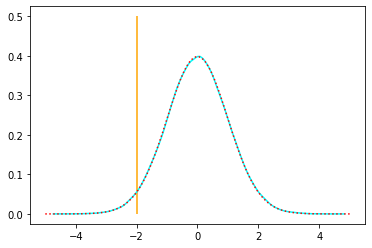

In [15]:
# points for plotting t distribution
from scipy.stats import t
points_x = np.linspace(-5,5,100) #Return evenly spaced 100 numbers over a specified interval -5 and 5
                                # عطيني ١٠٠ رقم بين ناقص خمسة وزائد خمسة

points_y = t.pdf(points_x ,df=(100-1-1)) # Probability density function at points_x of the given RV.
                                         # هات الكثافة الاحتمالية لهل ١٠٠ رقم


sns.distplot(t_stats ,hist=False ,color='cyan')
plt.plot(points_x , points_y ,color='red', linestyle=':')
plt.vlines(x=t_stat ,ymin=0, ymax=0.5, color='orange') # Plot vertical lines at each *x* from *ymin* to *ymax*.
                                                       # ymin, ymax: Respective beginning and end of each line

In [12]:
#np.linspace(-1,1,12)
#t.pdf(points_x ,df=(100-1-1))

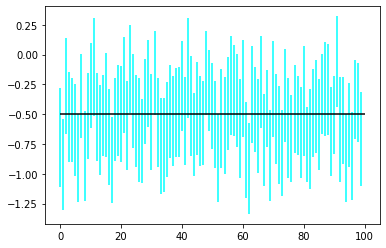

In [24]:

# Simulation of confidence intervals
beta1_hats = []        # create an empty list
beta0_hats = []        
sigma_2_beta_1s = []   
sigma_2_beta_0s = []   

for i in range (0,100):
    y = - 0.5 + 2 * x + np.random.randn(100, 1)
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y         # coefficients estimation
    beta0_hats.append(beta_hat [0][0])                  # coefficients estimation lists
    y_pred = X @ beta_hat                               # prediction of y
    sigma_2 = ((y-y_pred) ** 2).sum() / (100-1-1)       # sigma^2 page 22
    sigma_2_beta_1s.append(np.sqrt(sigma_2) * np.sqrt(np.linalg.inv(X.T @ X)[0,0]))
    beta10_ats = np.array(beta0_hats)
    sigma_2_beta_0s = np.array(sigma_2_beta_0s)
    
beta0_hats=np.array(beta0_hats)
sigma_2_beta_1s=np.array(sigma_2_beta_1s)
    
plt.vlines(x=range(0,100),
ymin=beta0_hats - t.ppf(1-0.05/2, 100-1-1) * sigma_2_beta_1s ,
ymax=beta0_hats + t.ppf(1-0.05/2, 100-1-1) * sigma_2_beta_1s , color='cyan') # 95% Konfidenzintervall, page 34
plt.hlines(y=-0.5, xmin=0, xmax =100)
plt.show()
#  Davon überdecken 94 Intervalle den exakten Erwartungswert y = -0.5; die übrigen 6 tun das nicht.

In [29]:
y = - 0.5 + 2 * x + np.random.randn(100, 1)
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y # coefficients estimation
#beta0_hats.append(beta_hat [0][0])

beta_hat

array([[-0.62850685],
       [ 2.20087939]])

In [37]:
print(sum((-0.5< beta0_hats - t.ppf(1-0.05/2, 100-1-1) * sigma_2_beta_1s) | 
          (-0.5>beta0_hats + t.ppf(1-0.05/2, 100-1-1) * sigma_2_beta_1s )))


5
